In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2018, 4, 28, 14, 40, 18, 833227)

In [3]:
now.year, now.month, now.day

(2018, 4, 28)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta   # 代表他们之间的时间差   926=days   56700=seconds

datetime.timedelta(926, 56700)

In [5]:
 delta.days, delta.seconds

(926, 56700)

In [6]:
#加上（或减去）一个或多个timedelta
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)  # 默认加了天数

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [8]:
# 字符串和datetime的相互转换
# 1. 利用str或strftime方法  可以被格式化为字符串
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [10]:
# 2.datetime.strptime将字符串转换为日期
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
# 总结 
# datetime.strptime是通过已知格式进行日期解析的最佳方式，但每次需要编写格式很麻烦，于是

In [13]:
from dateutil.parser import parse
print(parse('2011-01-03'))        # datetime.datetime(2011, 1, 3, 0, 0)
print(parse('Jan 31, 1997 10:45 PM'))
print(parse('6/12/2011', dayfirst=True))

2011-01-03 00:00:00
1997-01-31 22:45:00
2011-12-06 00:00:00


In [14]:
import pandas as pd
import numpy as np
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [15]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [16]:
idx[2]   # Not a Time

NaT

In [17]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [18]:
# 
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),datetime(2011, 1, 7), datetime(2011, 1, 8),datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts    

2011-01-02   -0.847850
2011-01-05   -0.203061
2011-01-07   -1.025878
2011-01-08   -0.302688
2011-01-10    0.257541
2011-01-12    0.481164
dtype: float64

In [19]:
ts.index   # 索引类型是DatetimeIndex  会自动排列的

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts + ts[::2]   # 6个 3个  有三个肯定为NaN

2011-01-02   -1.695700
2011-01-05         NaN
2011-01-07   -2.051756
2011-01-08         NaN
2011-01-10    0.515082
2011-01-12         NaN
dtype: float64

In [21]:
ts.index[0]   # 索引存的是 纳秒级别  是TimeStamp对象    ?  如何转化成为datetime对象

Timestamp('2011-01-02 00:00:00')

In [22]:
# 索引  选取  子集构建
ts

2011-01-02   -0.847850
2011-01-05   -0.203061
2011-01-07   -1.025878
2011-01-08   -0.302688
2011-01-10    0.257541
2011-01-12    0.481164
dtype: float64

In [23]:
stamp = ts.index[2]
print(ts[stamp])   # 反正时间序列时间是唯一的 那么当做index来传没啥不好的 太开放了 不知道效率如何
print( ts['1/10/2011'])
print(ts['20110110'])

-1.02587781669
0.257541154048
0.257541154048


In [24]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts.head()

2000-01-01   -1.053386
2000-01-02   -0.605649
2000-01-03    1.820704
2000-01-04   -1.295535
2000-01-05   -0.212476
Freq: D, dtype: float64

In [25]:
longer_ts['2001'].head()   # 只会拿年份为2001的数据  
# 举一反三  
# longer_ts['2001-05']

2001-01-01    0.367852
2001-01-02    0.260158
2001-01-03    0.604902
2001-01-04    0.463788
2001-01-05   -0.790779
Freq: D, dtype: float64

In [26]:
ts

2011-01-02   -0.847850
2011-01-05   -0.203061
2011-01-07   -1.025878
2011-01-08   -0.302688
2011-01-10    0.257541
2011-01-12    0.481164
dtype: float64

In [27]:
ts[datetime(2011, 1, 7) : ]   # 时间切片  还是感觉太随意了 不知道性能如何  
# 如果在这里改动数据    会改变源数据 

2011-01-07   -1.025878
2011-01-08   -0.302688
2011-01-10    0.257541
2011-01-12    0.481164
dtype: float64

In [28]:
ts.truncate(after='1/9/2011')  # 截取指定时间之前的

2011-01-02   -0.847850
2011-01-05   -0.203061
2011-01-07   -1.025878
2011-01-08   -0.302688
dtype: float64

In [29]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.810008,-0.893243,0.359642,-0.198009
2000-01-12,-2.080070,-1.034368,1.107895,-2.091685
2000-01-19,-0.949414,-0.432383,0.944340,-0.840766
2000-01-26,0.620091,-1.095528,-1.355223,0.511686
2000-02-02,0.060317,0.105740,-1.138332,-1.542515


In [30]:
long_df.loc['5-2001']   # 包含 2001年5月索引的数据 

,Colorado,Texas,New York,Ohio
2001-05-02,0.395572,0.560201,-0.019873,-0.106636
2001-05-09,-1.513130,-0.068437,-1.364130,0.378406
2001-05-16,0.276361,0.773159,0.398008,-0.823685
2001-05-23,1.738229,0.974738,-1.006925,1.078547
2001-05-30,1.955160,0.955689,-1.392501,-0.669867


In [31]:
# 带有重复索引的时间序列 
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [32]:
dup_ts.index.is_unique

False

In [33]:
dup_ts['1/3/2000'] # 如果没有重复的 返回索引下标   有重复  全部返回 

4

In [34]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [36]:
ts

2011-01-02   -0.847850
2011-01-05   -0.203061
2011-01-07   -1.025878
2011-01-08   -0.302688
2011-01-10    0.257541
2011-01-12    0.481164
dtype: float64

In [37]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [38]:
index = pd.date_range('2012-04-01', '2012-06-01')
index   # 默认情况下回按天计算时间点  

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [39]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [41]:
# 加入频率更好玩   BM : business end of month    还有很多其他的选择  
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [42]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)  # 规范化

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# 频率和日期偏移量
from pandas.tseries.offsets import Hour, Minute
hour = Hour(4)
hour    # Hour(2) + Minute(30)   ===  <150 * Minutes> 

<4 * Hours>

In [44]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq=hour)
#pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')   # the same

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [45]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [46]:
# WOM日期   week of month  西方的爱好  
rng = pd.date_range('2000-01-01', '2000-09-01' ,freq='WOM-3FRI')  # 每个月第三个星期五
list(rng)

[Timestamp('2000-01-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-02-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-03-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-04-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-05-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-06-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-07-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-08-18 00:00:00', freq='WOM-3FRI')]

In [47]:
# 移动数据
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.678049
2000-02-29    1.249839
2000-03-31   -0.360817
2000-04-30   -0.581880
Freq: M, dtype: float64

In [48]:
ts.shift(2)   

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.678049
2000-04-30    1.249839
Freq: M, dtype: float64

In [49]:
ts/ts.shift(1) -1   # 这样的写法真的让我觉得世界太奇妙了

2000-01-31         NaN
2000-02-29   -2.843286
2000-03-31   -1.288691
2000-04-30    0.612675
Freq: M, dtype: float64

In [50]:
ts.shift(2, freq='M')   # 加了频率后  不会去变动数据  而是会变动索引

2000-03-31   -0.678049
2000-04-30    1.249839
2000-05-31   -0.360817
2000-06-30   -0.581880
Freq: M, dtype: float64

In [51]:
ts.shift(5, freq='D')   # 为啥第一个没了  ????

2000-02-05   -0.678049
2000-03-05    1.249839
2000-04-05   -0.360817
2000-05-05   -0.581880
dtype: float64

In [52]:
ts.shift(1, freq='90T')  # 90min

2000-01-31 01:30:00   -0.678049
2000-02-29 01:30:00    1.249839
2000-03-31 01:30:00   -0.360817
2000-04-30 01:30:00   -0.581880
Freq: M, dtype: float64

In [53]:
# 偏移量改变时间
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
print(now + 3*Day())    # 不和前面的套路一样么
print(now + MonthEnd())
print(now + MonthEnd(2))

2011-11-20 00:00:00
2011-11-30 00:00:00
2011-12-31 00:00:00


In [54]:
offset = MonthEnd()
print(offset.rollforward(now))
print(offset.rollback(now))

2011-11-30 00:00:00
2011-10-31 00:00:00


In [55]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -2.097008
2000-01-19    1.032304
2000-01-23   -1.420629
2000-01-27   -0.709864
2000-01-31   -0.761073
2000-02-04   -1.194976
2000-02-08   -0.232057
2000-02-12    2.653074
2000-02-16    0.578472
2000-02-20    0.270965
2000-02-24    0.194025
2000-02-28    0.538921
2000-03-03    0.227993
2000-03-07    0.916119
2000-03-11    0.025905
2000-03-15   -1.726625
2000-03-19    0.186200
2000-03-23   -1.103363
2000-03-27   -1.784504
2000-03-31   -0.588066
Freq: 4D, dtype: float64

In [56]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.791254
2000-02-29    0.401203
2000-03-31   -0.480793
dtype: float64

In [57]:
# 更简单、更快速地实现该功能的办法是使用resample
ts.resample('M').mean()

2000-01-31   -0.791254
2000-02-29    0.401203
2000-03-31   -0.480793
Freq: M, dtype: float64

In [58]:
# 时区处理   有个库 直接用得了
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [59]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [60]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.index.tz)   # 没有指定时区
ts  # 这个写法非常nice

None


2012-03-09 09:30:00    0.402911
2012-03-10 09:30:00    1.374345
2012-03-11 09:30:00    0.465830
2012-03-12 09:30:00    0.334504
2012-03-13 09:30:00   -1.891626
2012-03-14 09:30:00    1.637296
Freq: D, dtype: float64

In [61]:
pd.date_range('3/9/2012 9:12', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:12:00+00:00', '2012-03-10 09:12:00+00:00',
               '2012-03-11 09:12:00+00:00', '2012-03-12 09:12:00+00:00',
               '2012-03-13 09:12:00+00:00', '2012-03-14 09:12:00+00:00',
               '2012-03-15 09:12:00+00:00', '2012-03-16 09:12:00+00:00',
               '2012-03-17 09:12:00+00:00', '2012-03-18 09:12:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [62]:
ts_utc = ts.tz_localize('UTC') # 将没有时区指定时区
ts_utc

2012-03-09 09:30:00+00:00    0.402911
2012-03-10 09:30:00+00:00    1.374345
2012-03-11 09:30:00+00:00    0.465830
2012-03-12 09:30:00+00:00    0.334504
2012-03-13 09:30:00+00:00   -1.891626
2012-03-14 09:30:00+00:00    1.637296
Freq: D, dtype: float64

In [63]:
# 一旦有了时区  就可以转化 切换到其他时区  
ts_utc.tz_convert('America/New_York') 

2012-03-09 04:30:00-05:00    0.402911
2012-03-10 04:30:00-05:00    1.374345
2012-03-11 05:30:00-04:00    0.465830
2012-03-12 05:30:00-04:00    0.334504
2012-03-13 05:30:00-04:00   -1.891626
2012-03-14 05:30:00-04:00    1.637296
Freq: D, dtype: float64

In [64]:
# 特殊的 Timestamp对象
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [65]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow   # 莫斯科是欧洲的？？？

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [66]:
stamp_utc.value

1299902400000000000

In [67]:
# Period 时期
p = pd.Period(2007, freq='A-DEC')  # 表示2017年1月到2017年12月
print(p+5)  
pd.Period('2014', freq='A-DEC') - p   # 如果频率一致  相减是单位数

2012


7

In [68]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng    

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [69]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.053640
2000-02    0.464834
2000-03    0.146030
2000-04   -1.072402
2000-05   -0.473766
2000-06    0.648325
Freq: M, dtype: float64

In [70]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')  # Q-DEC 表示以DEC月份结束的季度  每季度最后一个月 最后一个工作日
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [71]:
# Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。
p = pd.Period('2007', freq='A-DEC') # 年度时期
p.asfreq('M', how='start')          # 当年年末
p.asfreq('M', how='end')            # 年末的一个月度时期

Period('2007-12', 'M')

In [72]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [73]:
# 频率转换
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.208053
2007   -0.649300
2008   -0.005711
2009   -0.112529
Freq: A-DEC, dtype: float64

In [74]:
ts.asfreq('M', how='start')  # 转化成低频率

2006-01   -1.208053
2007-01   -0.649300
2008-01   -0.005711
2009-01   -0.112529
Freq: M, dtype: float64

In [75]:
ts.asfreq('B', how='end')

2006-12-29   -1.208053
2007-12-31   -0.649300
2008-12-31   -0.005711
2009-12-31   -0.112529
Freq: B, dtype: float64

In [76]:
# 按季度计算的时期频率
# 季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的概念，通常是一年12个月中某月的最后一个日历日或工作日
# pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC：
p = pd.Period('2012Q4', freq='Q-JAN')
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [83]:
# 要获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm.to_timestamp()

Timestamp('2007-08-30 16:00:00')

In [78]:
# ????
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [79]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [80]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [81]:
p.asfreq('M', how='start')

Period('2006-07', 'M')

In [82]:
p.asfreq('M', how='end')

Period('2007-06', 'M')

In [83]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.100999
2007    0.351019
2008   -0.285509
2009   -0.297740
Freq: A-DEC, dtype: float64

In [85]:
# 转换频率 
ts.asfreq('M', how='start')

2006-01    0.100999
2007-01    0.351019
2008-01   -0.285509
2009-01   -0.297740
Freq: M, dtype: float64

In [88]:
# 基于以上无用的  费时费力的   用了再来了解下
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [89]:
# 通过year和quarter 可以建立起PeriodIndex
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [91]:
data.index=index   # 赋值给索引
data.infl.head()  

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

In [93]:
# 重采样及频率转换   降采样   低频率 --- 高频率    升采样
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01    1.891534
2000-01-02    0.496496
2000-01-03   -0.534928
2000-01-04   -0.246672
2000-01-05    0.272002
Freq: D, dtype: float64

In [94]:
ts.resample('M').mean()   # 将30天 转化成一个月   

2000-01-31   -0.206942
2000-02-29    0.188000
2000-03-31   -0.034252
2000-04-30    0.407237
Freq: M, dtype: float64

In [95]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [97]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [98]:
ts.resample('5min', closed='right').sum()  # 注意左右区间 

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [99]:
# 你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易明白该时间戳到底表示的是哪个区间
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [100]:
# OHLC重采样    open hight low  close   蜡烛图
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [102]:
ts.resample('5min').ohlc()   # 知道这个可以做图了   It's very nice 

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [103]:
# 升采样和插值
frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.810314,-0.576630,0.091306,-1.454494
2000-01-12,0.147143,0.100049,-0.368118,0.393062


In [104]:
df_daily = frame.resample('D').asfreq()
df_daily   # 有些为NaN可以想办法填充    .ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.810314,-0.576630,0.091306,-1.454494
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.147143,0.100049,-0.368118,0.393062


In [113]:
# 通过时期进行重采样
frame = pd.DataFrame(np.random.randn(24, 4),index=pd.period_range('1-2000', '12-2001',freq='M'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.165285,-0.546014,0.669487,0.223593
2000-02,-2.031146,0.345309,0.596686,-1.074886
2000-03,0.049919,0.397024,-0.289610,-0.508825
2000-04,0.125797,0.212760,1.478617,0.547821
2000-05,-0.846699,-0.922968,0.509268,-0.297519


In [114]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame                # 搞不懂  为啥是这个样子    

,Colorado,Texas,New York,Ohio
2000,-0.266520,-0.037625,0.21464,0.204896
2001,0.483852,0.030627,0.49836,-0.020296


In [116]:
#  移动窗口函数   指数加权平均  可以圆滑噪音数据或断裂数据      moving window function
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [118]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


<IPython.core.display.Javascript object>


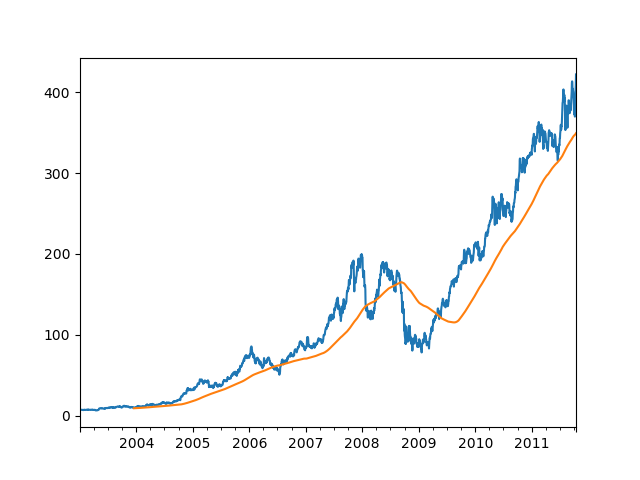

In [120]:
# 
%matplotlib notebook 
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()   # APPLE 股价的250日均线  

In [123]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]    # 刚刚开始不足窗口期  

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


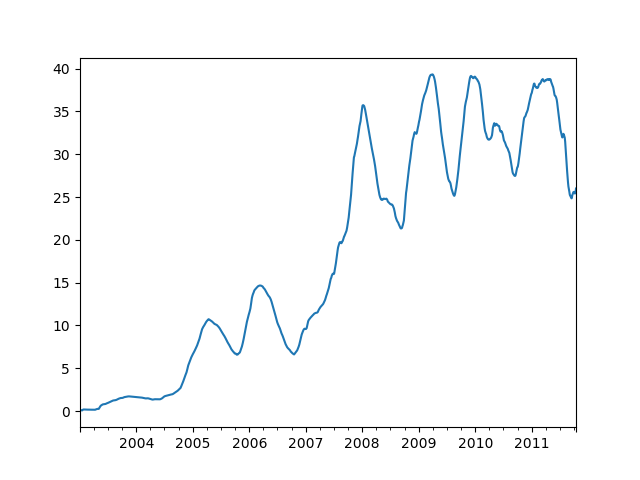

In [124]:
appl_std250.plot()

<IPython.core.display.Javascript object>


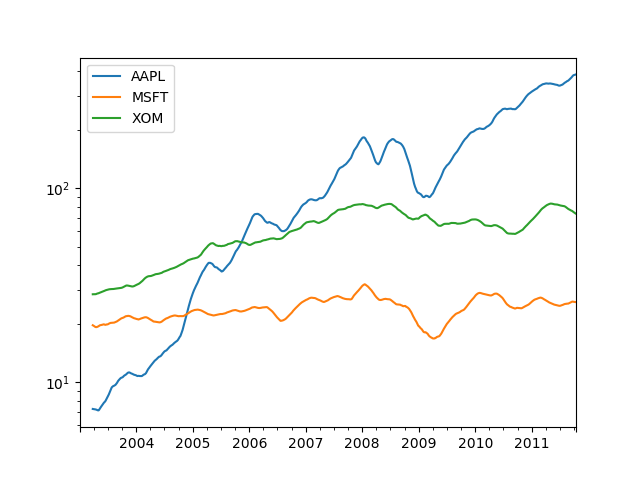

In [125]:
# 从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列    使用expanding
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)   #  各股价60日均线（对数Y轴）

In [127]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


<IPython.core.display.Javascript object>


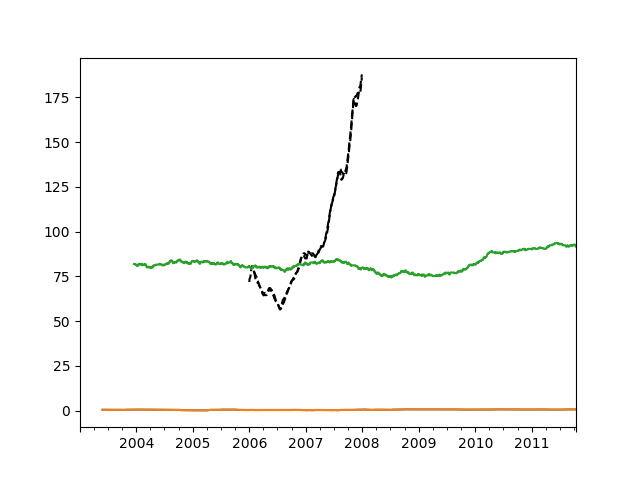

In [130]:
# 指数加权函数 
aapl_px = close_px.AAPL['2006' : '2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k--', label='EW MA')
#plt.legend()

<IPython.core.display.Javascript object>


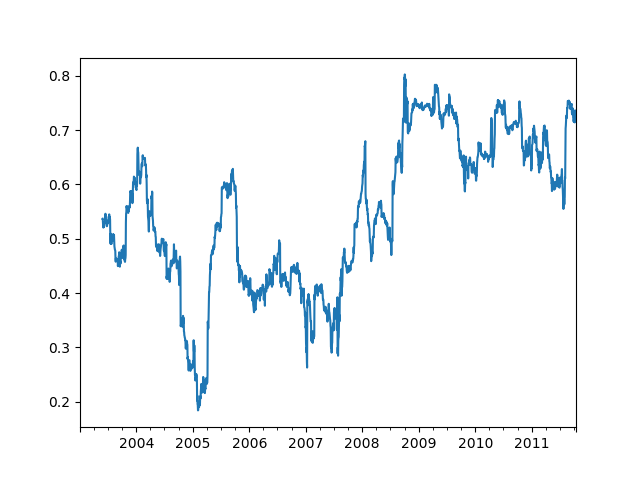

In [136]:
# 二元移动窗口函数
%matplotlib notebook 
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()    # 3只股票6个月的回报与标准普尔500指数的相关系数

<IPython.core.display.Javascript object>


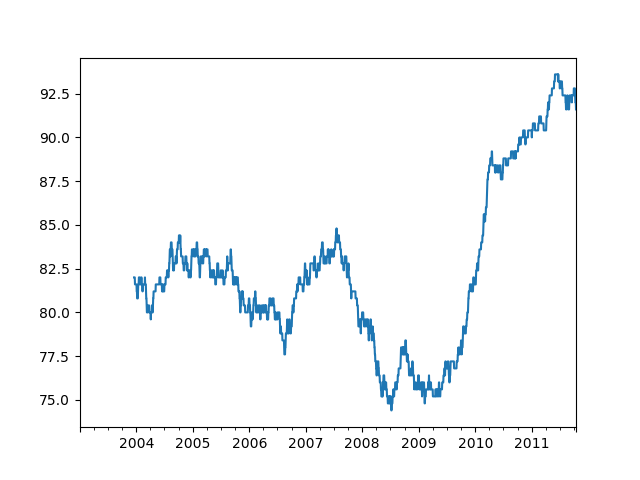

In [135]:
# 用户定义的移动窗口函数
%matplotlib notebook 
# 这部分太简略了  
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()    # AAPL 2%回报率的百分等级（一年窗口期）